# Reading Data

In [248]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [249]:
# importing libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics as ms
from sklearn.metrics import confusion_matrix
from xgboost.sklearn import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

In [250]:
#Train Data

train_data = pd.read_csv('/content/drive/My Drive/Hackathon/train_ctrUa4K.csv')
train_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [251]:
# Test Data

test_data = pd.read_csv('/content/drive/My Drive/Hackathon/test_lAUu6dG.csv')
test_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [252]:
print(train_data.shape)
print(test_data.shape)

(614, 13)
(367, 12)


In [253]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [254]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Data preprocessing

## Handling Null Values

In [255]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Null value columns in train dataset are :

['Gender' , 'Married' , 'Dependents' ,
'Self_Employed' , 'LoanAmount' , 'Loan_Amount_Term' , 'Credit_History']

In [256]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Null Value columns in test dataset are :

 ['Gender' , 'Dependents' , 'Self_Employed' , 'LoanAmount' , 'Loan_Amount_Term' , 'Credit_History']


Here we are replacing null values of categorical_feature with mode and null values of numerical_feature with median.

In [257]:
Categorical_Feature = ['Loan_ID', 'Gender' , 'Married' , 'Dependents' , 'Education' , 'Self_Employed' , 'Loan_Amount_Term' , 'Property_Area', 'Credit_History']
Numerical_Feature = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for i in Categorical_Feature:
  train_data[i].fillna(train_data[i].mode()[0], inplace=True)
  test_data[i].fillna(test_data[i].mode()[0], inplace=True)

for j in Numerical_Feature:
  train_data[j] = train_data[j].replace(np.nan , train_data[j].median())
  test_data[j] = test_data[j].replace(np.nan , test_data[j].median())

print("count of null values for train_data")
print(train_data.isnull().sum())
print(" ")
print("Count of null values for test_data")
print(test_data.isnull().sum())

count of null values for train_data
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
 
Count of null values for test_data
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## Encoding

unique values for categorical features in train and test datasets



In [258]:
Objecttype_feature_list = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

print("Unique value in train_data")
for i in Objecttype_feature_list:
  print("Count of unique values in column ", i, "is", train_data[i].nunique(), "which are", train_data[i].unique())

print(" ")
print(" ")

print("Unique value in test_data")
for i in Objecttype_feature_list:
  print("count of unique values in column ", i, "is", test_data[i].nunique(), "which are", test_data[i].unique())


Unique value in train_data
Count of unique values in column  Gender is 2 which are ['Male' 'Female']
Count of unique values in column  Married is 2 which are ['No' 'Yes']
Count of unique values in column  Dependents is 4 which are ['0' '1' '2' '3+']
Count of unique values in column  Education is 2 which are ['Graduate' 'Not Graduate']
Count of unique values in column  Self_Employed is 2 which are ['No' 'Yes']
Count of unique values in column  Property_Area is 3 which are ['Urban' 'Rural' 'Semiurban']
 
 
Unique value in test_data
count of unique values in column  Gender is 2 which are ['Male' 'Female']
count of unique values in column  Married is 2 which are ['Yes' 'No']
count of unique values in column  Dependents is 4 which are ['0' '1' '2' '3+']
count of unique values in column  Education is 2 which are ['Graduate' 'Not Graduate']
count of unique values in column  Self_Employed is 2 which are ['No' 'Yes']
count of unique values in column  Property_Area is 3 which are ['Urban' 'Semiu

For Encoding I am using one hot encoding because the count of unique values are less than 5.

In [259]:
train_data_LoanID = train_data['Loan_ID']
train_data = train_data.drop(columns=['Loan_ID'])
train_data_encoded = pd.get_dummies(train_data,drop_first=True)

test_data_LoanID = test_data['Loan_ID']
test_data = test_data.drop(columns=['Loan_ID'])
test_data_encoded = pd.get_dummies(test_data,drop_first=True)


In [260]:
train_data_encoded.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [261]:
test_data_encoded.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [262]:
# saving encoded train dataset 
train_data_encoded.to_csv('/content/drive/My Drive/Hackathon/final_train_encoded.csv')

In [263]:
# saving encoded test dataset
test_data_encoded.to_csv('/content/drive/My Drive/Hackathon/final_test_encoded.csv')

In [264]:
# saving loan status and dropping it from train dataset.
train_Loan_status=train_data_encoded['Loan_Status_Y']
train_data_encoded=train_data_encoded.drop('Loan_Status_Y',axis=1)

In [265]:
train_Loan_status.head(2)

0    1
1    0
Name: Loan_Status_Y, dtype: uint8

In [266]:
# saving train_loan_status
train_Loan_status.to_csv('/content/drive/My Drive/Hackathon/train_Loan_status.csv')

## EDA

In [267]:
eda_train_data_encoded = pd.read_csv('/content/drive/My Drive/Hackathon/final_train_encoded.csv')
eda_test_data_encoded = pd.read_csv('/content/drive/My Drive/Hackathon/final_test_encoded.csv')

In [268]:
eda_train_data_encoded=eda_train_data_encoded.drop(['Unnamed: 0'], axis=1)
eda_test_data_encoded=eda_test_data_encoded.drop(['Unnamed: 0'], axis=1)

In [269]:
eda_train_data_encoded.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0


In [270]:
eda_test_data_encoded.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1


In [271]:
eda_train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    int64  
 6   Married_Yes              614 non-null    int64  
 7   Dependents_1             614 non-null    int64  
 8   Dependents_2             614 non-null    int64  
 9   Dependents_3+            614 non-null    int64  
 10  Education_Not Graduate   614 non-null    int64  
 11  Self_Employed_Yes        614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6


The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Refer https://www.w3resource.com/pandas/dataframe/dataframe-describe.php#:~:text=DataFrame%20%2D%20describe()%20function,dataset's%20distribution%2C%20excluding%20NaN%20values.&text=The%20percentiles%20to%20include%20in,fall%20between%200%20and%201.


In [272]:
eda_train_data_encoded.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990,0.687296
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### univariate analysis

In [273]:
df=eda_train_data_encoded.drop(['Loan_Status_Y'],axis=1)

In [274]:
# checking skewness

for i in df:
  print('skewness of',i,'is',df[i].skew())

skewness of ApplicantIncome is 6.539513113994625
skewness of CoapplicantIncome is 7.491531216657306
skewness of LoanAmount is 2.743052748820892
skewness of Loan_Amount_Term is -2.4021122563890396
skewness of Credit_History is -2.0219705924848985
skewness of Gender_Male is -1.6487952886687591
skewness of Married_Yes is -0.6448502342244192
skewness of Dependents_1 is 1.7985055859918986
skewness of Dependents_2 is 1.8144326292320414
skewness of Dependents_3+ is 3.0289609627774667
skewness of Education_Not Graduate is 1.367622010164177
skewness of Self_Employed_Yes is 2.159796196971883
skewness of Property_Area_Semiurban is 0.4979483157127445
skewness of Property_Area_Urban is 0.7297229458371128



*   High skewness means -->  skewness is less than -1 or skewnwss is greater that 1

*   Moderate skewness means --> skewness is in range [-1,-0.5] or skewness is in range [0.5,1].

*   nearly symmetric means --> skewness is in range [-0.5,0.5]

Observations:

Highly skewed features are - Gender_Male,, Dependents_1, Dependents_2, Dependents_3+, Education_Not Graduate, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History


Moderate skewed features are - Married_Yes, Property_Area_Urban


symmetric skewness fatures are - Property_Area_Semiurban


In [275]:
eda_train_data_encoded['Loan_Status_Y'].value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

As we can see the counts, our dataset is imbalanced dataset. Count of 1' is nearly twice as of 0

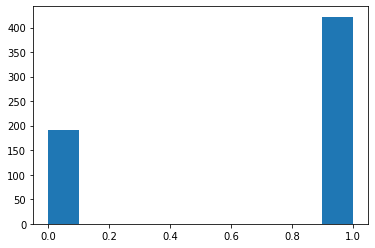

In [278]:
eda_train_data_encoded['Loan_Status_Y'].hist(grid = False)

From above graph we can say that our data is imbalanced.

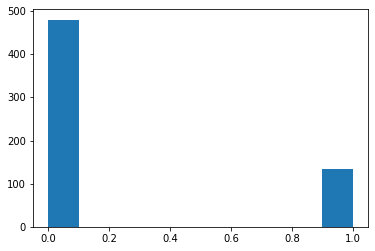

In [279]:
eda_train_data_encoded['Education_Not Graduate'].hist(grid = False)

{'Not Graduate': 1 , 'Graduate': 0}, as we can see count of 0 is greater than 
count of 1 - means no of people who applied for Loan are mostly Educated people.


Applicant Income

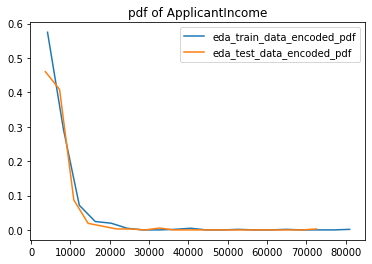

In [280]:
counts, bin_edges = np.histogram(eda_train_data_encoded['ApplicantIncome'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

counts_1, bin_edges_1 = np.histogram(eda_test_data_encoded['ApplicantIncome'], bins=20, density = True)
pdf_1 = counts_1/(sum(counts_1))
plt.plot(bin_edges_1[1:],pdf_1)

plt.title('pdf of ApplicantIncome')
plt.legend(['eda_train_data_encoded_pdf', 'eda_test_data_encoded_pdf'])
plt.show()

As we can see that both train_data and test_data dist plot looks similar, means having similar kind of distributions

LoanAmount

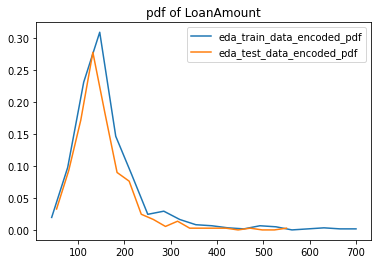

In [281]:
counts, bin_edges = np.histogram(eda_train_data_encoded['LoanAmount'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

counts_1, bin_edges_1 = np.histogram(eda_test_data_encoded['LoanAmount'], bins=20, density = True)
pdf_1 = counts_1/(sum(counts_1))
plt.plot(bin_edges_1[1:],pdf_1)

plt.title('pdf of LoanAmount')
plt.legend(['eda_train_data_encoded_pdf', 'eda_test_data_encoded_pdf'])
plt.show()

As we can see that both train_data and test_data dist plot looks similar, means having similar kind of distributions

Loan_Amount_Term

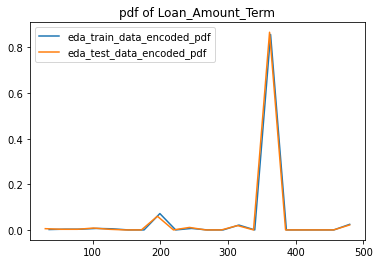

In [282]:
counts, bin_edges = np.histogram(eda_train_data_encoded['Loan_Amount_Term'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

counts_1, bin_edges_1 = np.histogram(eda_test_data_encoded['Loan_Amount_Term'], bins=20, density = True)
pdf_1 = counts_1/(sum(counts_1))
plt.plot(bin_edges_1[1:],pdf_1)

plt.title('pdf of Loan_Amount_Term')
plt.legend(['eda_train_data_encoded_pdf', 'eda_test_data_encoded_pdf'])
plt.show()

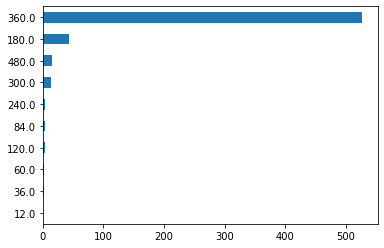

In [283]:
eda_train_data_encoded['Loan_Amount_Term'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

Most People take Term of loan for 360 Months.

CoapplicantIncome

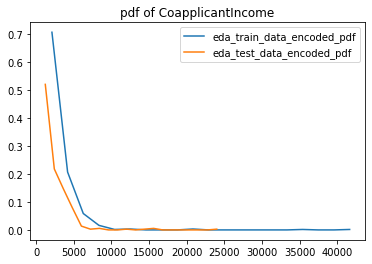

In [284]:
counts, bin_edges = np.histogram(eda_train_data_encoded['CoapplicantIncome'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

counts_1, bin_edges_1 = np.histogram(eda_test_data_encoded['CoapplicantIncome'], bins=20, density = True)
pdf_1 = counts_1/(sum(counts_1))
plt.plot(bin_edges_1[1:],pdf_1)

plt.title('pdf of CoapplicantIncome')
plt.legend(['eda_train_data_encoded_pdf', 'eda_test_data_encoded_pdf'])
plt.show()

As we can see that both train_data and test_data dist plot looks similar, means having similar kind of distributions. 
we can see that the graph follows the power law distributions 
Very few people have higher Income

### Bivariate Analysis

Education_Not Graduate {'Not Graduate': 1 , 'Graduate': 0}

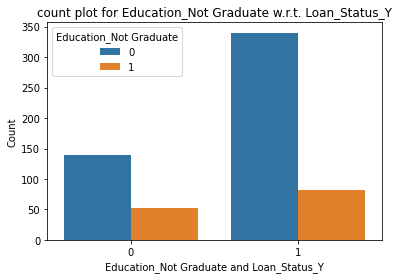

In [285]:
sns.countplot('Loan_Status_Y', hue='Education_Not Graduate', data=eda_train_data_encoded)
plt.xlabel("Education_Not Graduate and Loan_Status_Y")
plt.ylabel("Count")

plt.title("count plot for Education_Not Graduate w.r.t. Loan_Status_Y")
plt.show()

As we can see that Education column have impact on Loan_Status. People, who are educated have higher chance of getting the loan. 

Gender_Male - {'Male': 1 , 'Female': 0}

In [286]:
eda_train_data_encoded.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

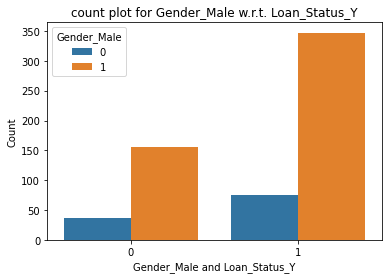

In [287]:
sns.countplot('Loan_Status_Y', hue='Gender_Male', data=eda_train_data_encoded)
plt.xlabel("Gender_Male and Loan_Status_Y")
plt.ylabel("Count")
plt.title("count plot for Gender_Male w.r.t. Loan_Status_Y")
plt.show()

As we can see that Gender column has an impact on Loan_Status. Count of male is greater than the count of female for Loan_status_Y. 

Self_Employed_Yes - {'No': 0 , 'Yes': 1}

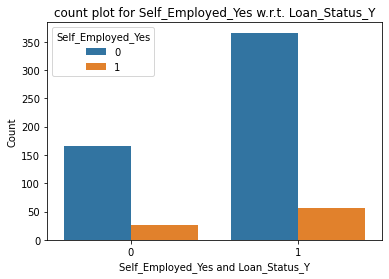

In [288]:
sns.countplot('Loan_Status_Y', hue='Self_Employed_Yes', data=eda_train_data_encoded)
plt.xlabel("Self_Employed_Yes and Loan_Status_Y")
plt.ylabel("Count")
plt.title("count plot for Self_Employed_Yes w.r.t. Loan_Status_Y")
plt.show()

As we can see that count of non-self_Employed is much greater than the self_employed, means people who are self_Employed have lower chance of getting the Loan

ApplicantIncome

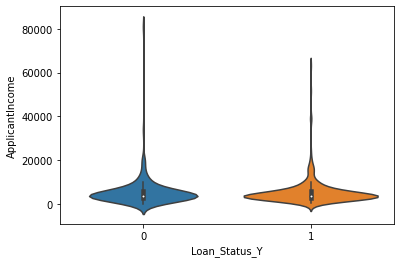

In [289]:
sns.violinplot(x="Loan_Status_Y", y="ApplicantIncome", data=eda_train_data_encoded, size=8)
plt.show()

In [290]:
np.mean(eda_train_data_encoded['ApplicantIncome'])

5403.459283387622

As we can see that most of the people have income in very short range. The graph is looking like Gaussian with skewness. Values are centered around 5403

LoanAmount

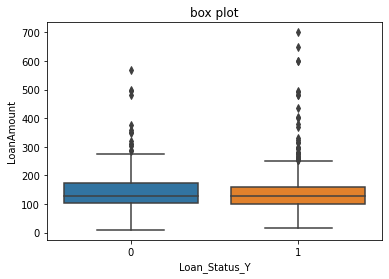

In [291]:
plt.title('box plot')
sns.boxplot(x='Loan_Status_Y',y='LoanAmount', data=eda_train_data_encoded)
plt.show()

As we can see that range is similar for Loan_Status 'Y' and 'N'. and We have outliers in LoanAmount. 

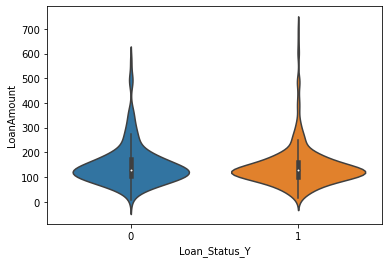

In [292]:
sns.violinplot(x="Loan_Status_Y", y="LoanAmount", data=eda_train_data_encoded, size=8)
plt.show()

Married_Yes - {'No': 0 , 'Yes': 1}

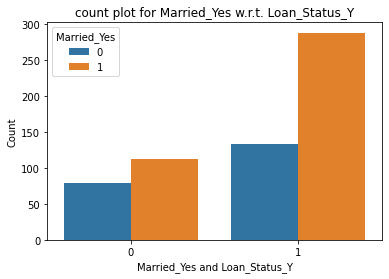

In [293]:
sns.countplot('Loan_Status_Y', hue='Married_Yes', data=eda_train_data_encoded)
plt.xlabel("Married_Yes and Loan_Status_Y")
plt.ylabel("Count")
plt.title("count plot for Married_Yes w.r.t. Loan_Status_Y")
plt.show()

As we can see the chances of married people is high in Loan approval 

Credit_History

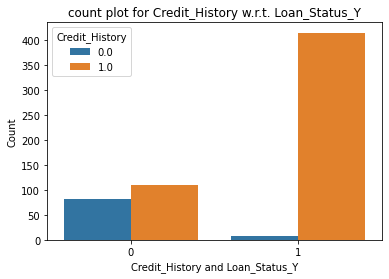

In [294]:
sns.countplot('Loan_Status_Y', hue='Credit_History', data=eda_train_data_encoded)
plt.xlabel("Credit_History and Loan_Status_Y")
plt.ylabel("Count")
plt.title("count plot for Credit_History w.r.t. Loan_Status_Y")
plt.show()

The Cedit_History for 1, which means meeting guidelines have higher chances of loan approval

LoanAmount and Loan_Amount_Term

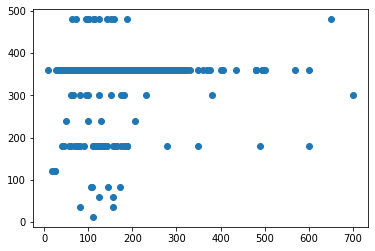

In [295]:
plt.scatter(eda_train_data_encoded['LoanAmount'], eda_train_data_encoded['Loan_Amount_Term'])
plt.show()

Here we can observe that there is little correlation between LoanAmount and Loan_Amount_Term. For less no of months we have less Loan Amount

LoanAmount and ApplicantIncome

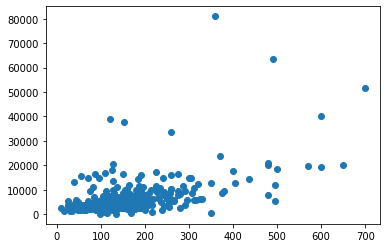

In [296]:
plt.scatter(eda_train_data_encoded['LoanAmount'], eda_train_data_encoded['ApplicantIncome'])
plt.show()

Here we can observe that we have positive correlation between LoanAmount and ApplicantIncome.

## Normalization

In [297]:
Norm_train_data = train_data_encoded
Norm_test_data = test_data_encoded

In [298]:

lst = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in lst:
  Norm_train_data[i]=((Norm_train_data[i]-Norm_train_data[i].min())/(Norm_train_data[i].max()-Norm_train_data[i].min()))
  Norm_test_data[i]=((Norm_test_data[i]-Norm_test_data[i].min())/(Norm_test_data[i].max()-Norm_test_data[i].min()))


In [299]:
Norm_train_data.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,0,0,0,0,0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,0,0,0,0,0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1,1,0,0,0,0,1,0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1,1,0,0,0,1,0,0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,0,0,0,0,0,1


In [300]:
Norm_test_data.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.078865,0.0000,0.157088,0.746835,1.0,1,1,0,0,0,0,0,0,1
1,0.042411,0.0625,0.187739,0.746835,1.0,1,1,1,0,0,0,0,0,1


In [301]:
Norm_train_data.shape

(614, 14)

## EDA and Outliers 

In [302]:
after_eda_train_data = Norm_train_data
after_eda_test_data = Norm_test_data

In [303]:
after_eda_train_data.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,0,0,0,0,0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,0,0,0,0,0,0


In [304]:
after_eda_train_data.shape

(614, 14)

ApplicantIncome

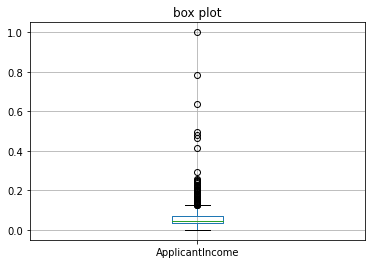

In [305]:
plt.title('box plot')
after_eda_train_data.boxplot(column='ApplicantIncome')
plt.show()

In [306]:
IQR = (np.percentile(after_eda_train_data['ApplicantIncome'], 75)) - (np.percentile(after_eda_train_data['ApplicantIncome'], 25))
min = ((np.percentile(after_eda_train_data['ApplicantIncome'], 25)) - 1.5 * IQR)
max = ((np.percentile(after_eda_train_data['ApplicantIncome'], 75)) + 1.5 * IQR)
  
for j in range(len(after_eda_train_data['ApplicantIncome'])):
  if (after_eda_train_data['ApplicantIncome'][j]>=max):
    after_eda_train_data['ApplicantIncome'][j]=max
  elif (after_eda_train_data['ApplicantIncome'][j]<=min):
    after_eda_train_data['ApplicantIncome'][j]=min


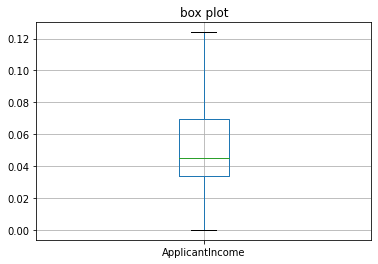

In [307]:
plt.title('box plot')
after_eda_train_data.boxplot(column='ApplicantIncome')
plt.show()

LoanAmount

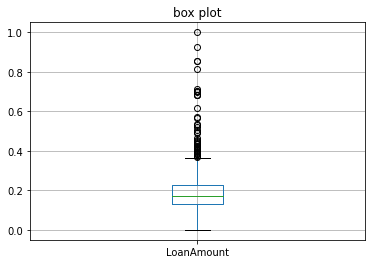

In [308]:
plt.title('box plot')
after_eda_train_data.boxplot(column='LoanAmount')
plt.show()

In [309]:
IQR = (np.percentile(after_eda_train_data['LoanAmount'], 75)) - (np.percentile(after_eda_train_data['LoanAmount'], 25))
min = ((np.percentile(after_eda_train_data['LoanAmount'], 25)) - 1.5 * IQR)
max = ((np.percentile(after_eda_train_data['LoanAmount'], 75)) + 1.5 * IQR)
  
for j in range(len(after_eda_train_data['LoanAmount'])):
  if (after_eda_train_data['LoanAmount'][j]>=max):
    after_eda_train_data['LoanAmount'][j]=max
  elif (after_eda_train_data['LoanAmount'][j]<=min):
    after_eda_train_data['LoanAmount'][j]=min


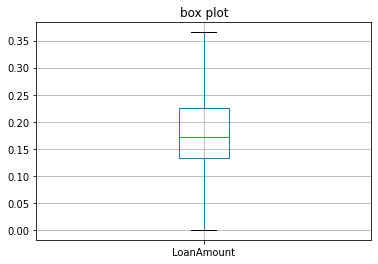

In [310]:
plt.title('box plot')
after_eda_train_data.boxplot(column='LoanAmount')
plt.show()

CoapplicantIncome

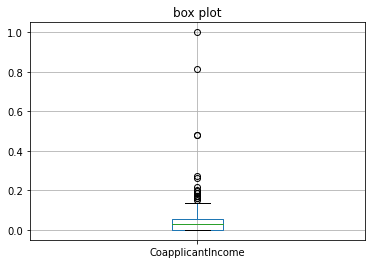

In [311]:
plt.title('box plot')
after_eda_train_data.boxplot(column='CoapplicantIncome')
plt.show()

In [312]:
IQR = (np.percentile(after_eda_train_data['CoapplicantIncome'], 75)) - (np.percentile(after_eda_train_data['CoapplicantIncome'], 25))
min = ((np.percentile(after_eda_train_data['CoapplicantIncome'], 25)) - 1.5 * IQR)
max = ((np.percentile(after_eda_train_data['CoapplicantIncome'], 75)) + 1.5 * IQR)
  
for j in range(len(after_eda_train_data['CoapplicantIncome'])):
  if (after_eda_train_data['CoapplicantIncome'][j]>=max):
    after_eda_train_data['CoapplicantIncome'][j]=max
  elif (after_eda_train_data['CoapplicantIncome'][j]<=min):
    after_eda_train_data['CoapplicantIncome'][j]=min


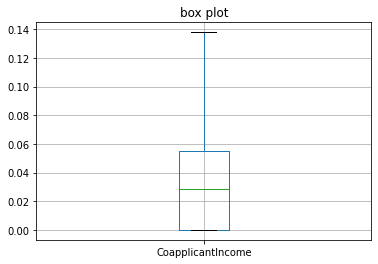

In [313]:
plt.title('box plot')
after_eda_train_data.boxplot(column='CoapplicantIncome')
plt.show()

In [314]:
after_eda_train_data.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,0,0,0,0,0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,0,0,0,0,0,0


In [315]:
after_eda_train_data.shape

(614, 14)

# Feature Engineering 

### correlation Matrix

In [316]:
after_eda_train_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.228956,0.557953,-0.023926,0.035345,0.065040,0.022480,0.082446,0.006335,0.093201,-0.203087,0.237122,-0.016858,-0.015294
CoapplicantIncome,-0.228956,1.000000,0.265021,-0.029295,-0.001710,0.192438,0.221217,-0.020011,0.018537,-0.045998,-0.049895,-0.032784,-0.018945,-0.052557
LoanAmount,0.557953,0.265021,1.000000,0.063612,0.004320,0.143426,0.177417,0.064201,0.058138,0.119530,-0.176194,0.114297,0.007546,-0.066726
Loan_Amount_Term,-0.023926,-0.029295,0.063612,1.000000,-0.004705,-0.074030,-0.100912,-0.088492,-0.010609,-0.077273,-0.073928,-0.033739,0.059141,-0.094279
Credit_History,0.035345,-0.001710,0.004320,-0.004705,1.000000,0.009170,0.010938,0.009757,0.007987,-0.060473,-0.073658,-0.001550,0.035976,-0.016934
Gender_Male,0.065040,0.192438,0.143426,-0.074030,0.009170,1.000000,0.364569,-0.004466,0.129953,0.096319,0.045364,-0.000525,-0.108623,0.034530
Married_Yes,0.022480,0.221217,0.177417,-0.100912,0.010938,0.364569,1.000000,0.113853,0.249547,0.132566,0.012304,0.004489,0.005845,0.000546
Dependents_1,0.082446,-0.020011,0.064201,-0.088492,0.009757,-0.004466,0.113853,1.000000,-0.198046,-0.134337,-0.013355,0.082044,0.011661,0.069320
Dependents_2,0.006335,0.018537,0.058138,-0.010609,0.007987,0.129953,0.249547,-0.198046,1.000000,-0.133547,0.020822,0.032434,-0.012017,0.016569
Dependents_3+,0.093201,-0.045998,0.119530,-0.077273,-0.060473,0.096319,0.132566,-0.134337,-0.133547,1.000000,0.055288,0.003278,0.007863,-0.047460


### VIF (Variance Inflation factor)

In [317]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["var"] = after_eda_train_data.columns
vif["VIF"] = [variance_inflation_factor(after_eda_train_data.values, i) for i in range(after_eda_train_data.shape[1])]
vif2=vif.sort_values(by=['VIF'], ascending=False)
vif2.reset_index(inplace = True)
print(vif2)

    index                      var        VIF
0       2               LoanAmount  12.610731
1       3         Loan_Amount_Term  11.596259
2       0          ApplicantIncome   8.330731
3       5              Gender_Male   6.293171
4       4           Credit_History   6.162412
5       6              Married_Yes   3.879556
6       1        CoapplicantIncome   2.604927
7      12  Property_Area_Semiurban   2.238478
8      13      Property_Area_Urban   2.023489
9       8             Dependents_2   1.444838
10      7             Dependents_1   1.386158
11     10   Education_Not Graduate   1.320038
12      9            Dependents_3+   1.251478
13     11        Self_Employed_Yes   1.238483


In [318]:
after_eda_train_data.to_csv('/content/drive/My Drive/Hackathon/final_train_df.csv')
after_eda_test_data.to_csv('/content/drive/My Drive/Hackathon/final_test_df.csv')


As we have already seen in the scatter plat - EDA part, there is little correlation between LoanAmount and Loan_Amount_Term. 
Here also we can see vif for LoanAmount is higher.
But We cannot remove LoanAmount feature because it is important for our modeling.

# Model

In [319]:
y = pd.read_csv('/content/drive/My Drive/Hackathon/train_Loan_status.csv')
m_train_data = pd.read_csv('/content/drive/My Drive/Hackathon/final_train_df.csv')
m_test_data = pd.read_csv('/content/drive/My Drive/Hackathon/final_test_df.csv')
m_train_data=m_train_data.drop(['Unnamed: 0'], axis=1)
m_test_data=m_test_data.drop(['Unnamed: 0'], axis=1)
y=y.drop(['Unnamed: 0'], axis=1)

In [320]:
m_train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,0,0,0,0,0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,0,0,0,0,0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1,1,0,0,0,0,1,0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1,1,0,0,0,1,0,0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,0,0,0,0,0,1


In [321]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(m_train_data, y, stratify=y, test_size=0.2, random_state=1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape )

(491, 14) (123, 14) (491, 1) (123, 1)


## CatBoost

In [322]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

In [324]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.001,0.01,0.1,0.2,0.3],
         'l2_leaf_reg': [1,4,9,100],
         'iterations': [300]}
cb = CatBoostClassifier(loss_function='MultiClass')
cb_model = GridSearchCV(cb, params, n_jobs=-1)
cb_model.fit(train_X, train_y,verbose=False)
print (cb_model.best_params_)

{'depth': 5, 'iterations': 350, 'l2_leaf_reg': 1, 'learning_rate': 0.02}


In [325]:
clf = CatBoostClassifier(loss_function='MultiClass', depth=5, iterations= 350, l2_leaf_reg= 1, learning_rate= 0.02)
clf.fit(train_X,train_y)

tr_pred=clf.predict(train_X)
val_pred=clf.predict(val_X)
print ("Accuracy for train is for ",ms.accuracy_score(train_y,tr_pred))
print ("Accuracy for val is for ",ms.accuracy_score(val_y,val_pred))


0:	learn: 0.6858474	total: 1.71ms	remaining: 597ms
1:	learn: 0.6786179	total: 5.83ms	remaining: 1.01s
2:	learn: 0.6716755	total: 7.37ms	remaining: 853ms
3:	learn: 0.6651524	total: 8.39ms	remaining: 726ms
4:	learn: 0.6588735	total: 9.82ms	remaining: 678ms
5:	learn: 0.6526646	total: 11.6ms	remaining: 664ms
6:	learn: 0.6465219	total: 13.1ms	remaining: 643ms
7:	learn: 0.6407981	total: 14.6ms	remaining: 622ms
8:	learn: 0.6349144	total: 16.2ms	remaining: 612ms
9:	learn: 0.6294031	total: 17.5ms	remaining: 596ms
10:	learn: 0.6240144	total: 19ms	remaining: 585ms
11:	learn: 0.6190849	total: 20.5ms	remaining: 578ms
12:	learn: 0.6139148	total: 22ms	remaining: 570ms
13:	learn: 0.6093260	total: 23.6ms	remaining: 566ms
14:	learn: 0.6047310	total: 25ms	remaining: 559ms
15:	learn: 0.6000648	total: 26.6ms	remaining: 554ms
16:	learn: 0.5955482	total: 28.1ms	remaining: 550ms
17:	learn: 0.5915021	total: 29.5ms	remaining: 544ms
18:	learn: 0.5874262	total: 31ms	remaining: 540ms
19:	learn: 0.5834441	total: 32

In [326]:
confusion_matrix(val_y,val_pred)

array([[19, 19],
       [ 0, 85]])

In [327]:
# predicting test data

y_test_pred=clf.predict(m_test_data)
test_sub=pd.DataFrame(y_test_pred,columns=['Loan_Status'])
test_sub['Loan_ID']=test_data_LoanID

In [328]:
test_sub['Loan_Status']= test_sub['Loan_Status'].map({0: 'N' , 1: 'Y'})
test_sub=test_sub[['Loan_ID','Loan_Status']]

test_sub

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [329]:
test_sub.to_csv('catbboost_submission.csv',index=False)


The test score for catboost classifier is : 0.7847222222222222.



## SGD Classifier

In [357]:
# Always scale the input. The most convenient way is to use a pipeline.

alph=[0.001,0.01,0.1,1,10,100]


for i in alph:
  clf = make_pipeline(StandardScaler(), SGDClassifier(loss='log', max_iter=1000, tol=1e-3, class_weight="balanced", alpha=i ))
  clf.fit(train_X, train_y)
  val_pred=clf.predict(val_X)
  print ("Accuracy for ",i, ms.accuracy_score(val_y,val_pred))
  


Accuracy for  0.001 0.7723577235772358
Accuracy for  0.01 0.7317073170731707
Accuracy for  0.1 0.7317073170731707
Accuracy for  1 0.6422764227642277
Accuracy for  10 0.6910569105691057
Accuracy for  100 0.6910569105691057


As we can see the validation accuracy of catboost is greater than the accuracy of SGD Classifier.

## XGBoost

In [352]:
x_cfl=XGBClassifier(weight=[0.5,10,0.7,7], objective='multi:softprob',tree_method='hist', max_delta_step=2, n_jobs=-1, num_class=2)
prams={'learning_rate':uniform(0.01, 0.4),
     'n_estimators':randint(20,200),
     'max_depth':randint(3,30)}

random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1)
random_cfl.fit(train_X, train_y)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.7s finished


{'learning_rate': 0.1285606891705723, 'max_depth': 24, 'n_estimators': 167}


In [353]:
x_cfl=XGBClassifier(objective='multi:softprob', max_delta_step=5, tree_method='hist', n_estimators=167, max_depth=24, learning_rate=0.128, n_jobs=-1, num_class=2)
x_cfl.fit(train_X, train_y,verbose=True)
predict_y = x_cfl.predict(train_X)
print ("Accuracy for ", ms.accuracy_score(train_y,predict_y))
predict_y = x_cfl.predict(val_X)
print ("Accuracy for val is for ", ms.accuracy_score(val_y,val_pred))

Accuracy for  0.9979633401221996
Accuracy for val is for  0.8373983739837398


as we can see this model's performance is not good.

## Random Forest

In [348]:
params={'n_estimators':randint(20,50), 'max_depth':randint(2,30)}

r_cfl=RandomForestClassifier(random_state=42,n_jobs=-1)

random_cfl=RandomizedSearchCV(r_cfl,param_distributions=params,verbose=10,n_jobs=-1)
random_cfl.fit(train_X, train_y)
print(random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.4s


{'max_depth': 4, 'n_estimators': 40}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished


In [349]:
r_cfl=RandomForestClassifier(n_estimators=40,random_state=42,n_jobs=-1, max_depth=4)
r_cfl.fit(train_X, train_y)
tr_pred=r_cfl.predict(train_X)
val_pred=r_cfl.predict(val_X)
print ("Accuracy for train is for ",i, ms.accuracy_score(train_y,tr_pred))
print ("Accuracy for val is for ",i, ms.accuracy_score(val_y,val_pred))

Accuracy for train is for  100 0.8085539714867617
Accuracy for val is for  100 0.8373983739837398


As we can see that catboost accuracy is slightly greater than the random forest accuracy.

Catboost is the best model of all.

# Summary

In [358]:
df=pd.DataFrame(data=[['CatBoostClassifier Model',0.8455284552845529], ['SGDClassifier',0.7723577235772358],['XGBClassifier',0.8373983739837398], ['RamdomForestClassifier',0.837398373983739]], columns=['Model','Validation accuracy'])
df

,Model,Validation accuracy
0,CatBoostClassifier Model,0.845528
1,SGDClassifier,0.772358
2,XGBClassifier,0.837398
3,RamdomForestClassifier,0.837398
